## Handling Imbalanced Dataset
Comes in use when your target feature may have an imbalance. 
For example your model is supposed to identify cats and dogs. you have like 900 photos of dogs and 100 photos of cats. <br>
The model can be trained on this data and is more likely to predict a picture as a dog and be right 90% of the time. <br>
But it could continuously fail miserably while trying to identify a cat. <br>
Approaches to handling an imbalanced dataset are:
1. Up Sampling: Increase the number of minority targets. In our current example, find a way to add more cats in the target feature.
2. Down Sampling: Decrease the number of dogs in the target feature, so the model has more of an equal amount of data to be trained with for both features.

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [4]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [7]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


<Axes: xlabel='feature_1', ylabel='Count'>

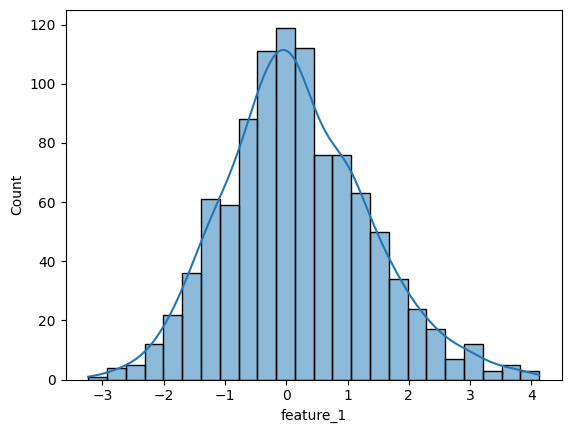

In [8]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]
sns.histplot(df['feature_1'], kde=True)
# sns.histplot(df_majority['feature_1'], kde=True)

In [9]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [10]:
df_minority_upsampled.shape

(900, 3)

In [11]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


<Axes: xlabel='feature_1', ylabel='Count'>

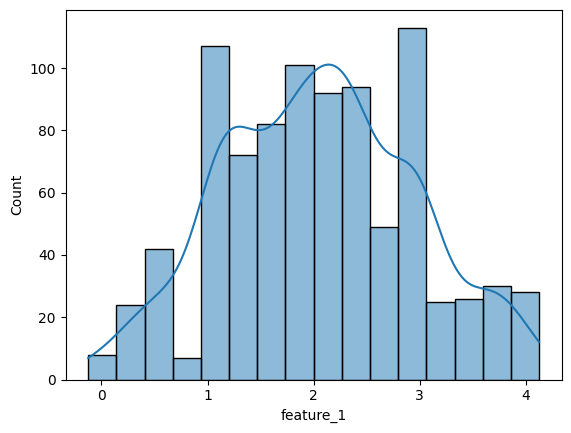

In [12]:
df_minority_upsampled
sns.histplot(df_minority_upsampled['feature_1'], kde=True)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versio

<Axes: xlabel='feature_2', ylabel='Count'>

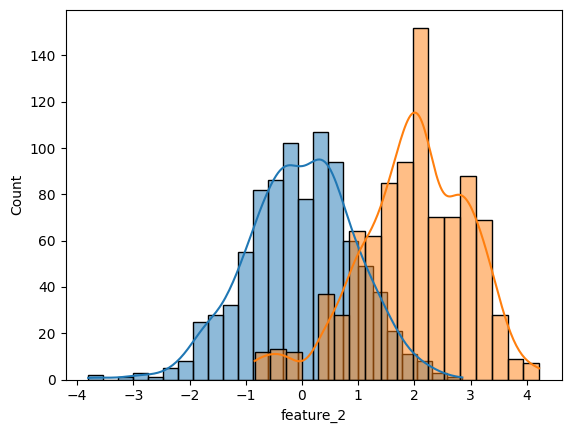

In [13]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
sns.histplot(df_majority['feature_2'], kde=True)
sns.histplot(df_minority_upsampled['feature_2'], kde=True)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


<Axes: xlabel='feature_2', ylabel='Count'>

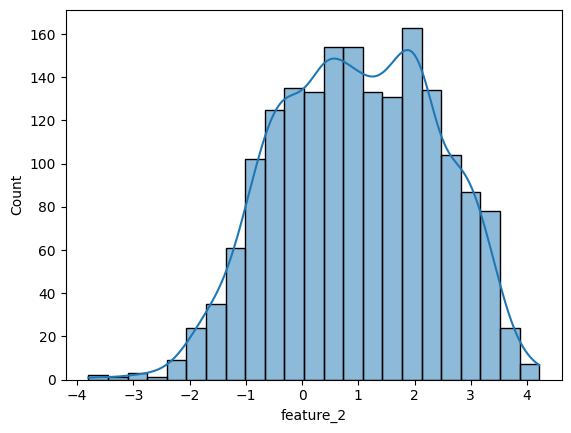

In [14]:
df_upsampled['target'].value_counts()
# sns.histplot(df_upsampled['feature_1'], kde=True)
sns.histplot(df_upsampled['feature_2'], kde=True)

## Down Sampling

In [15]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [16]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [17]:

from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

<Axes: xlabel='feature_1', ylabel='Count'>

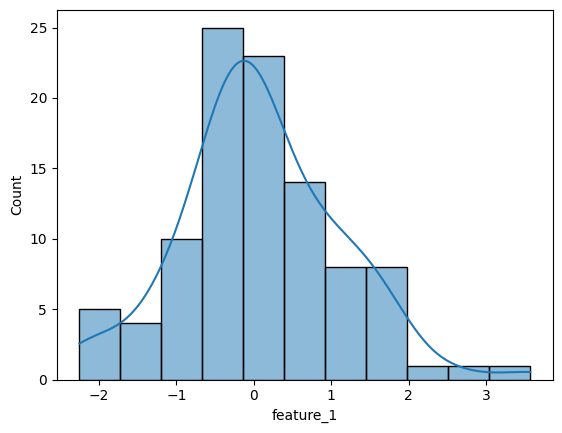

In [18]:
df_majority_downsampled.shape
sns.histplot(df_majority_downsampled['feature_1'], kde=True)

In [19]:
print(df_majority_downsampled['target'].value_counts())

target
0    100
Name: count, dtype: int64


In [20]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority]).reset_index(drop=True)


In [21]:
df_downsampled.shape

(200, 3)

<Axes: xlabel='feature_1', ylabel='Count'>

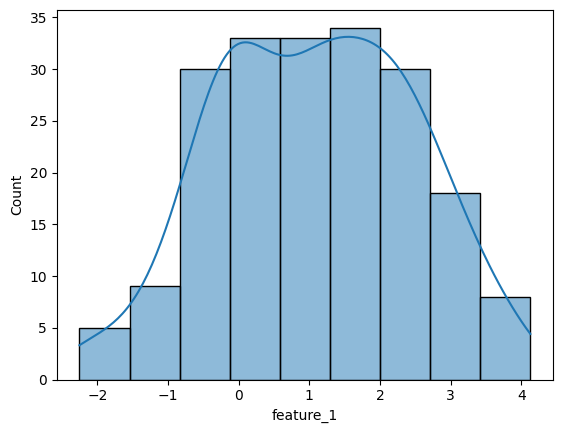

In [22]:
sns.histplot(df_downsampled['feature_1'], kde=True)